### A. HISTOGRAM STRETCHING

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

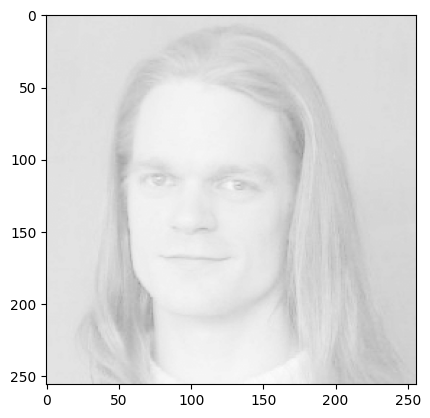

In [ ]:
img_bgr = cv2.imread('img2.jpg')
plt.imshow(img_bgr)

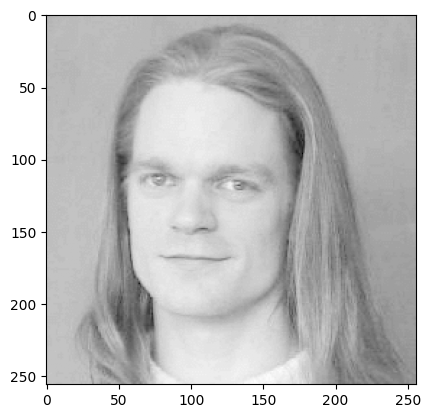

In [ ]:
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(256, 256)

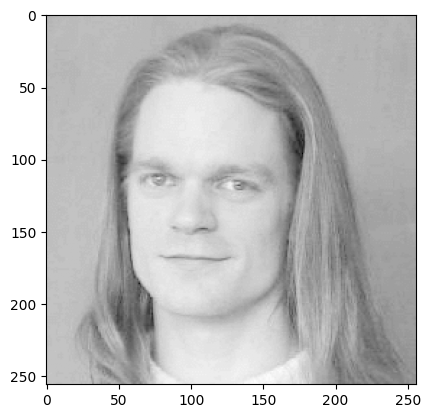

In [ ]:
plt.imshow(img, cmap = 'gray')

In [ ]:
r_min = img.min()
print(r_min)
r_max = img.max()
print(r_max)

143
253


array([[221, 221, 221, ..., 219, 219, 219],
       [221, 221, 219, ..., 219, 221, 219],
       [221, 221, 221, ..., 219, 219, 219],
       ...,
       [227, 227, 227, ..., 205, 205, 207],
       [225, 227, 227, ..., 207, 207, 207],
       [225, 227, 227, ..., 207, 207, 209]], dtype=uint8)
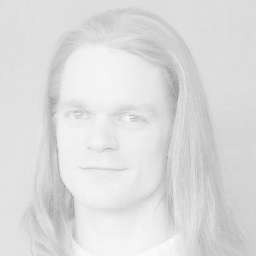

In [ ]:
img

### Histogram with function

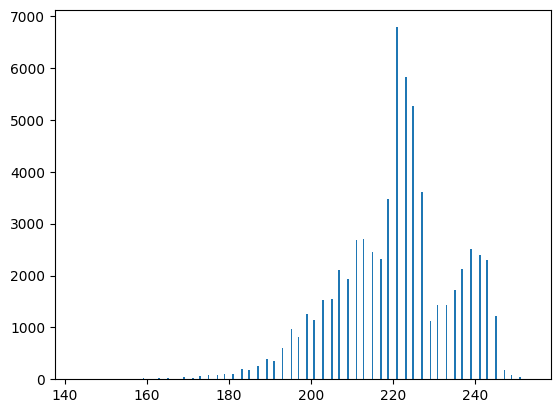

In [ ]:
plt.hist(img.ravel(), bins=256)
plt.show()

### Histogram without function

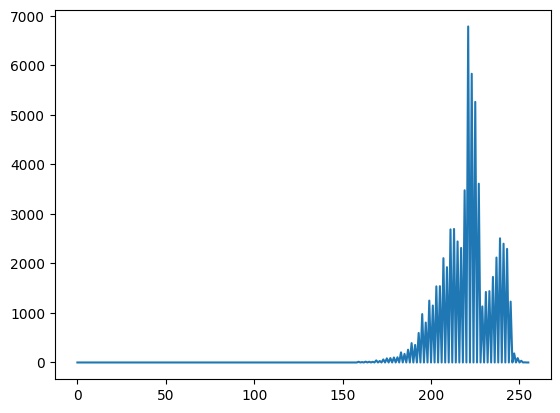

In [ ]:
histogram = np.zeros(256, dtype = int)

for row in img:
  for pixel in row:
    histogram[pixel] += 1

plt.plot(histogram)
plt.show()

In [ ]:
histogram

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,   

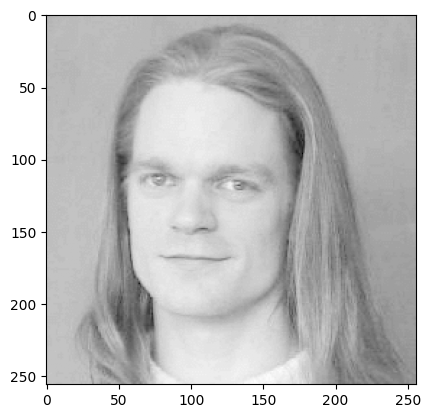

In [ ]:
s_max = 255
s_min = 0

stretched_img = (s_max - s_min)/(r_max - r_min) * (img - r_min) + s_min
plt.imshow(stretched_img, cmap='gray')

In [ ]:
stretched_img

array([[180.81818182, 180.81818182, 180.81818182, ..., 176.18181818,
        176.18181818, 176.18181818],
       [180.81818182, 180.81818182, 176.18181818, ..., 176.18181818,
        180.81818182, 176.18181818],
       [180.81818182, 180.81818182, 180.81818182, ..., 176.18181818,
        176.18181818, 176.18181818],
       ...,
       [194.72727273, 194.72727273, 194.72727273, ..., 143.72727273,
        143.72727273, 148.36363636],
       [190.09090909, 194.72727273, 194.72727273, ..., 148.36363636,
        148.36363636, 148.36363636],
       [190.09090909, 194.72727273, 194.72727273, ..., 148.36363636,
        148.36363636, 153.        ]])

In [ ]:
stretched_img.min()

np.float64(0.0)

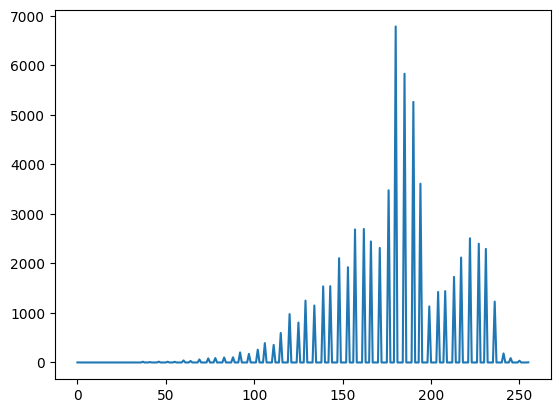

In [ ]:
histogram_stretched = np.zeros(256, dtype = int)

for row in stretched_img:
  for pixel in row:
    histogram_stretched[int(pixel)] += 1

plt.plot(histogram_stretched)
plt.show()

### B. HISTOGRAM EQUALISATION

In [ ]:
frequency = np.zeros(256, dtype = int)
count = 0
for row in img:
  for pixel in row:
    frequency[pixel] += 1
    count += 1

In [ ]:
frequency

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,   

In [ ]:
count

65536

In [ ]:
probability = np.zeros(256, dtype = float)
for i in range(len(frequency)):
  probability[i] = frequency[i]/count

print(probability)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
sum = 0
cdf = np.zeros(256, dtype = float)
for i in range(len(probability)):
  sum += probability[i]
  cdf[i] = sum

print(cdf)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
inter = np.zeros(256, dtype = int)
for i in range(len(cdf)):
  inter[i] = cdf[i]*255

print(inter)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1
   1   2   2   3   3   3   3   4   4   6   6   7   7   9   9  13  13  16
  16  21  21  26  26  32  32  38  38  46  46  53  53  64  64  74  74  84
  84  93  93 106 106 133 133 155 155 176 176 190 190 194 194 200 200 206
 206 212 212 221 221 230 230 240 240 249 249 253 25

In [ ]:
for i in range(len(frequency)):
  print(f"{i}: {frequency[i]}, {inter[i]}")

0: 0, 0
1: 0, 0
2: 0, 0
3: 0, 0
4: 0, 0
5: 0, 0
6: 0, 0
7: 0, 0
8: 0, 0
9: 0, 0
10: 0, 0
11: 0, 0
12: 0, 0
13: 0, 0
14: 0, 0
15: 0, 0
16: 0, 0
17: 0, 0
18: 0, 0
19: 0, 0
20: 0, 0
21: 0, 0
22: 0, 0
23: 0, 0
24: 0, 0
25: 0, 0
26: 0, 0
27: 0, 0
28: 0, 0
29: 0, 0
30: 0, 0
31: 0, 0
32: 0, 0
33: 0, 0
34: 0, 0
35: 0, 0
36: 0, 0
37: 0, 0
38: 0, 0
39: 0, 0
40: 0, 0
41: 0, 0
42: 0, 0
43: 0, 0
44: 0, 0
45: 0, 0
46: 0, 0
47: 0, 0
48: 0, 0
49: 0, 0
50: 0, 0
51: 0, 0
52: 0, 0
53: 0, 0
54: 0, 0
55: 0, 0
56: 0, 0
57: 0, 0
58: 0, 0
59: 0, 0
60: 0, 0
61: 0, 0
62: 0, 0
63: 0, 0
64: 0, 0
65: 0, 0
66: 0, 0
67: 0, 0
68: 0, 0
69: 0, 0
70: 0, 0
71: 0, 0
72: 0, 0
73: 0, 0
74: 0, 0
75: 0, 0
76: 0, 0
77: 0, 0
78: 0, 0
79: 0, 0
80: 0, 0
81: 0, 0
82: 0, 0
83: 0, 0
84: 0, 0
85: 0, 0
86: 0, 0
87: 0, 0
88: 0, 0
89: 0, 0
90: 0, 0
91: 0, 0
92: 0, 0
93: 0, 0
94: 0, 0
95: 0, 0
96: 0, 0
97: 0, 0
98: 0, 0
99: 0, 0
100: 0, 0
101: 0, 0
102: 0, 0
103: 0, 0
104: 0, 0
105: 0, 0
106: 0, 0
107: 0, 0
108: 0, 0
109: 0, 0
110: 0, 0


In [ ]:
print(frequency)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1    0    0    0    0    0    0    0    1    0    0
    0    0    0    2    0   15    0    8    0   17    0   15    0   14
    0   42    0   30    0   61    0   83    0   89    0  101    0  105
    0  204    0  174    0  258    0  391    0  354    0  596    0  977
    0 

In [ ]:
output_frequency = np.zeros(256, dtype = int)
for i in range(len(frequency)):
  output_frequency[inter[i]] += frequency[i]

print(output_frequency)

[ 206  273  105  378  258    0  391  354    0  596    0    0    0  977
    0    0  806    0    0    0    0 1249    0    0    0    0 1150    0
    0    0    0    0 1537    0    0    0    0    0 1541    0    0    0
    0    0    0    0 2106    0    0    0    0    0    0 1924    0    0
    0    0    0    0    0    0    0    0 2687    0    0    0    0    0
    0    0    0    0 2696    0    0    0    0    0    0    0    0    0
 2444    0    0    0    0    0    0    0    0 2313    0    0    0    0
    0    0    0    0    0    0    0    0 3477    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 6785    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 5830    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 5262    0    0    0    0    0
    0    0    0    0    0    0    0    0 3610    0    0    0 1132    0
    0 

In [ ]:
for i in range(len(output_frequency)):
  sum += output_frequency[i]

sum

np.float64(65537.0)

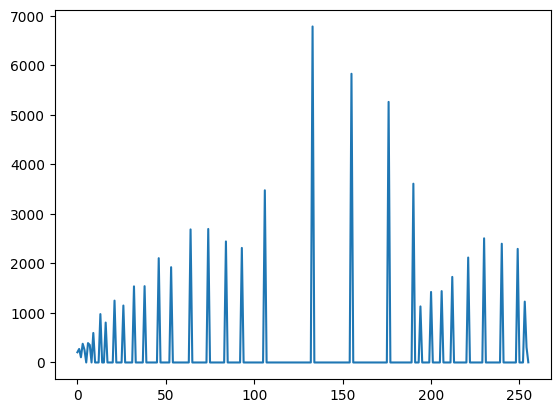

In [ ]:
plt.plot(output_frequency)

In [ ]:
img_new = np.zeros(img.shape, dtype = int)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    img_new[i][j] = inter[img[i][j]]


In [ ]:
img_new

array([[133, 133, 133, ..., 106, 106, 106],
       [133, 133, 106, ..., 106, 133, 106],
       [133, 133, 133, ..., 106, 106, 106],
       ...,
       [190, 190, 190, ...,  38,  38,  46],
       [176, 190, 190, ...,  46,  46,  46],
       [176, 190, 190, ...,  46,  46,  53]])

array([[221, 221, 221, ..., 219, 219, 219],
       [221, 221, 219, ..., 219, 221, 219],
       [221, 221, 221, ..., 219, 219, 219],
       ...,
       [227, 227, 227, ..., 205, 205, 207],
       [225, 227, 227, ..., 207, 207, 207],
       [225, 227, 227, ..., 207, 207, 209]], dtype=uint8)
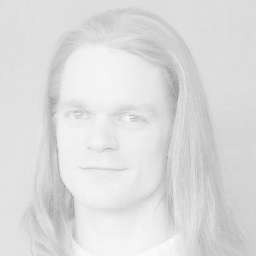

In [ ]:
img

In [ ]:
inter[221]

np.int64(133)

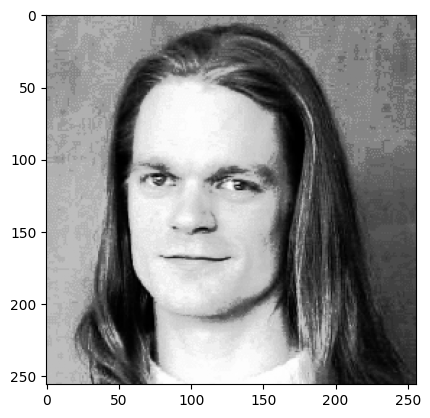

In [ ]:
plt.imshow(img_new, cmap='gray')